In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
# data = pd.read_csv('C:/Users/mdhla/OneDrive/Documents/Postgraduate/MSc/Semester 1/SFDS/week 6/DAE_project/lawyers')
data = pd.read_csv('data/lawyers')

### Data Preprocessing

In [4]:
data.head()

,ID,AGE,CTM,CLM,LVL,SDY
0,1,54,11,10,Senior Partner,35
1,2,25,1,0,Associate,10
2,3,30,9,8,Associate,87
3,4,26,3,3,Associate,8
4,5,28,3,5,Associate,4


In [5]:
data_encoded = pd.get_dummies(data, columns=['LVL'], dtype=int)
data_encoded.head()

,ID,AGE,CTM,CLM,SDY,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner
0,1,54,11,10,35,0,0,0,0,1
1,2,25,1,0,10,1,0,0,0,0
2,3,30,9,8,87,1,0,0,0,0
3,4,26,3,3,8,1,0,0,0,0
4,5,28,3,5,4,1,0,0,0,0


In [6]:
normalizer = MinMaxScaler().set_output(transform='pandas')
normalized_data = normalizer.fit_transform(data_encoded)

In [7]:
normalized_data

,ID,AGE,CTM,CLM,SDY,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner
0,0.000000,0.58,0.40,0.40,0.192308,0.0,0.0,0.0,0.0,1.0
1,0.005025,0.00,0.00,0.00,0.054945,1.0,0.0,0.0,0.0,0.0
2,0.010050,0.10,0.32,0.32,0.478022,1.0,0.0,0.0,0.0,0.0
3,0.015075,0.02,0.08,0.12,0.043956,1.0,0.0,0.0,0.0,0.0
4,0.020101,0.06,0.08,0.20,0.021978,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
195,0.979899,0.22,0.20,0.20,0.027473,0.0,0.0,0.0,1.0,0.0
196,0.984925,0.36,0.20,0.24,0.021978,0.0,0.0,0.0,1.0,0.0
197,0.989950,0.82,0.28,0.36,0.060440,0.0,0.0,0.0,0.0,1.0
198,0.994975,0.92,0.36,0.36,0.098901,0.0,0.0,0.0,0.0,1.0


In [8]:
y = normalized_data['CTM']
X = normalized_data[[column for column in normalized_data.columns if column not in ['CTM', 'ID'] ]]

In [9]:
X.head()

,AGE,CLM,SDY,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner
0,0.58,0.40,0.192308,0.0,0.0,0.0,0.0,1.0
1,0.00,0.00,0.054945,1.0,0.0,0.0,0.0,0.0
2,0.10,0.32,0.478022,1.0,0.0,0.0,0.0,0.0
3,0.02,0.12,0.043956,1.0,0.0,0.0,0.0,0.0
4,0.06,0.20,0.021978,1.0,0.0,0.0,0.0,0.0


In [10]:
y.head()

0    0.40
1    0.00
2    0.32
3    0.08
4    0.08
Name: CTM, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)

# Question 2

## Forward Selection

Iteration 1: Selected features: ['CLM'] R-squared: 0.7116


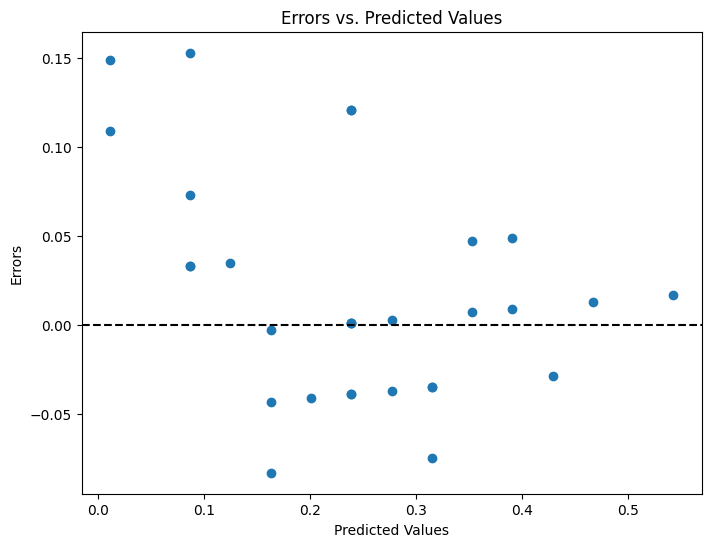

Iteration 2: Selected features: ['AGE', 'CLM'] R-squared: 0.7068


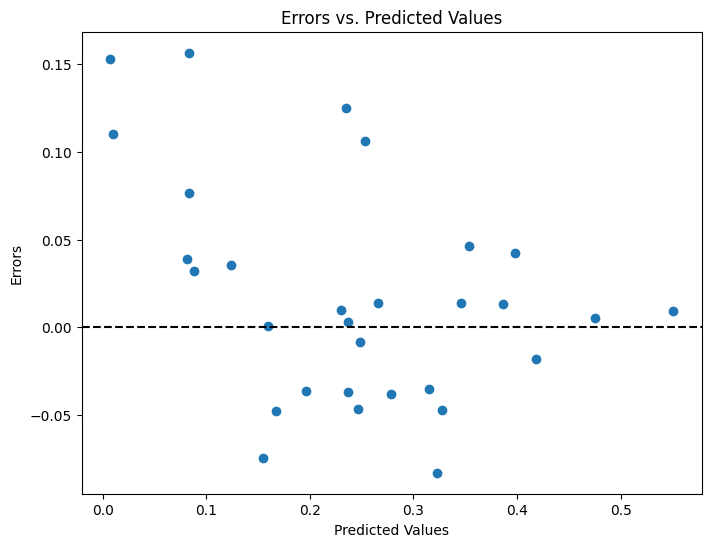

Iteration 3: Selected features: ['AGE', 'CLM', 'SDY'] R-squared: 0.7143


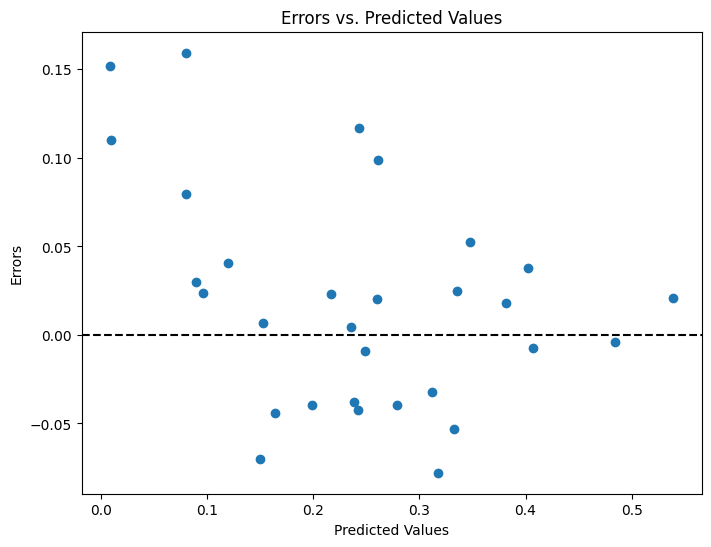

Iteration 4: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Senior Partner'] R-squared: 0.7083


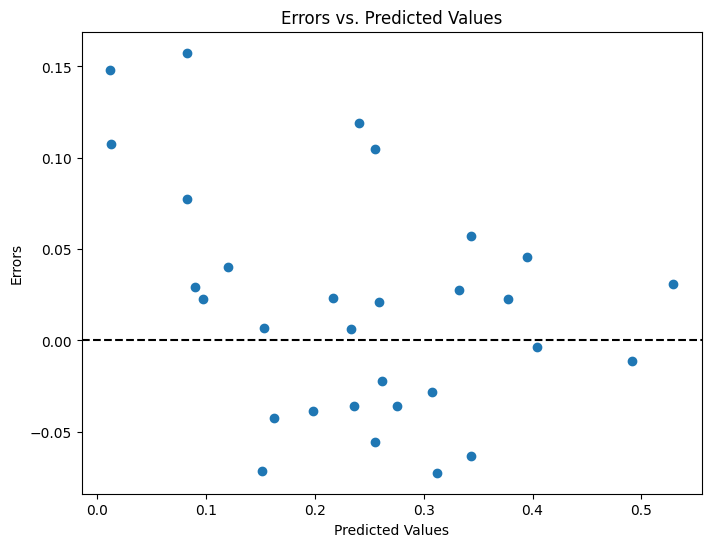

Iteration 5: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7082


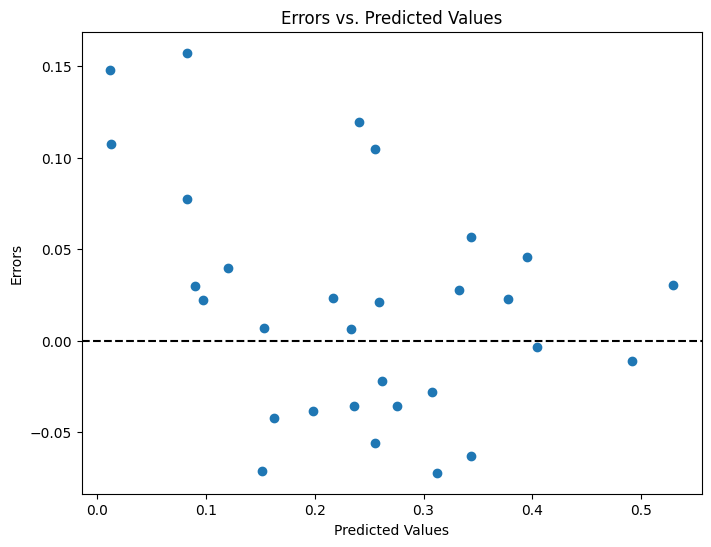

Iteration 6: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Managing Partner', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7193


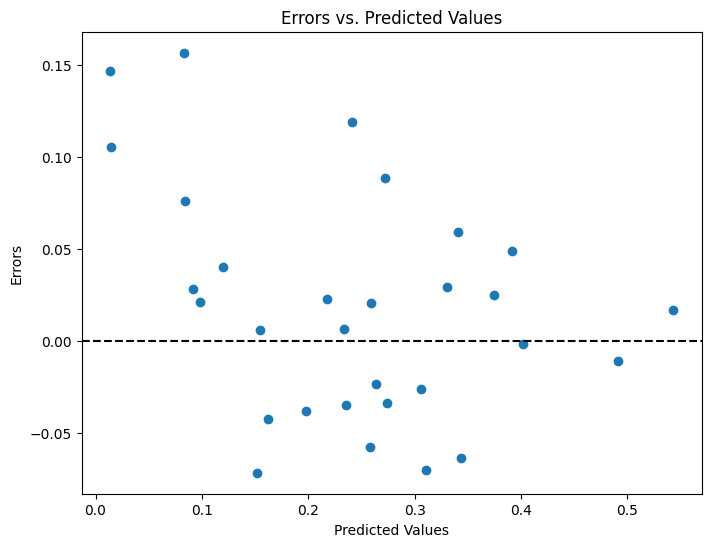

Iteration 7: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Junior Partner', 'LVL_Managing Partner', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7213


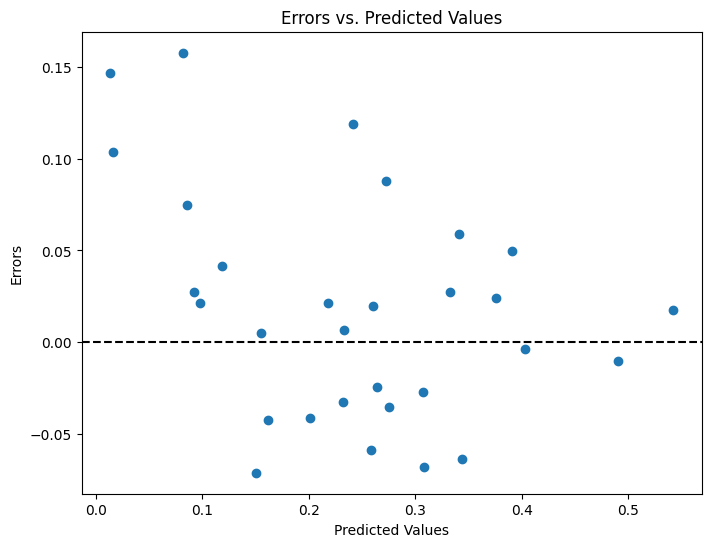

In [128]:
linear_model = LinearRegression()
selection_process = SequentialFeatureSelector(linear_model, direction='forward', scoring='r2')

for i in range(1, len(X_train.columns)):
    selection_process.n_features_to_select = i
    selection_process.fit(X_train, y_train)


    selected_features = list(X.columns[selection_process.get_support()])
    linear_model.fit(X_train[selected_features], y_train)
    y_pred = linear_model.predict(X_test[selected_features])
    r_squared = r2_score(y_test, y_pred)

    print(f'Iteration {i}: Selected features: {list(X.columns[selection_process.get_support()])} R-squared: {r_squared:.4f}')

    errors = y_test - y_pred

    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, errors)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Errors vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
    plt.show()


## Backward Selection

In [1]:
selection_process = SequentialFeatureSelector(linear_model, direction='backward', scoring='r2')

for i in range(len(X_train.columns)-1, 0, -1):
    selection_process.n_features_to_select = i
    selection_process.fit(X_train, y_train)

    selected_features = list(X_train.columns[selection_process.get_support()])
    linear_model.fit(X_train[selected_features], y_train)
    y_pred = linear_model.predict(X_test[selected_features])
    r_squared = r2_score(y_test, y_pred)

    print(f'Iteration {len(X_train.columns) - i}: Selected features: {selected_features} R-squared: {r_squared:.4f}')

    errors = y_test - y_pred

    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, errors)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Errors vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
    plt.show()


NameError: name 'SequentialFeatureSelector' is not defined

## __2.2 Lasso Selection__

The selection of features, for alpha = 0.01, in each iteration gives the importance of those features in predicting the number of cases this month. This is determined based on the penalized regression coefficients estimated by Lasso regression. Features that are consistently selected across multiple iterations - 'CLM', 'LVL_Associate', and 'LVL_Senior Partner', are deemed to have 'higher importance' in the model. The absence of the other features as iterations go on indicate that these features are likely to have been penalized to zero coefficients. W e say that these features do not contribute significantly to predicting the target variable, after considering the effects of other features.

As such, having CLM, LVL_Associate, and LVL_Senior Partner as the only features in the final iterations suggests that these features have the most significant impact on predicting the number of cases this month according to the model.

Iteration 1: Selected features: ['CLM'] R-squared: 0.7126


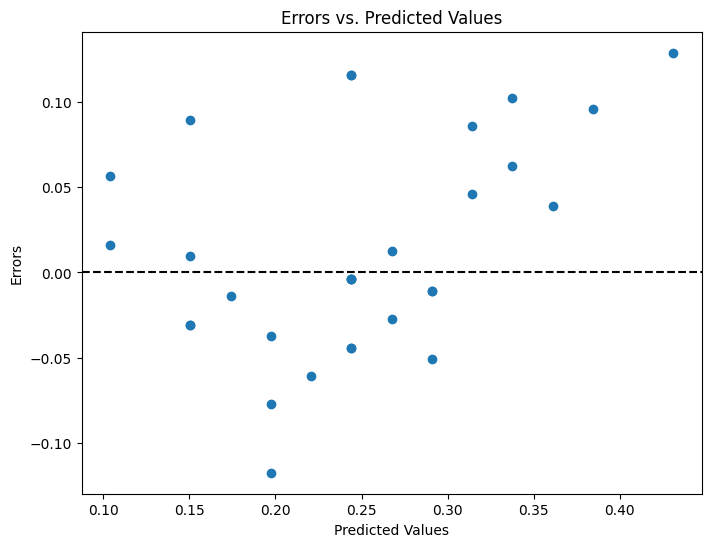

Iteration 2: Selected features: ['CLM', 'LVL_Senior Partner'] R-squared: 0.6584


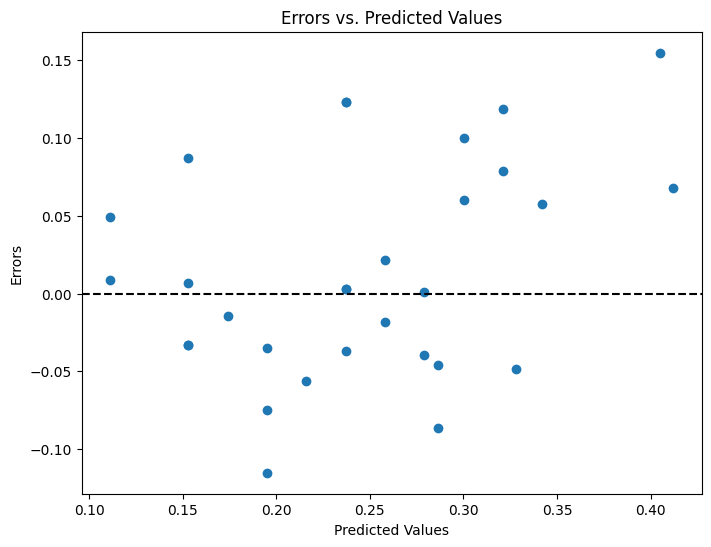

Iteration 3: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6543


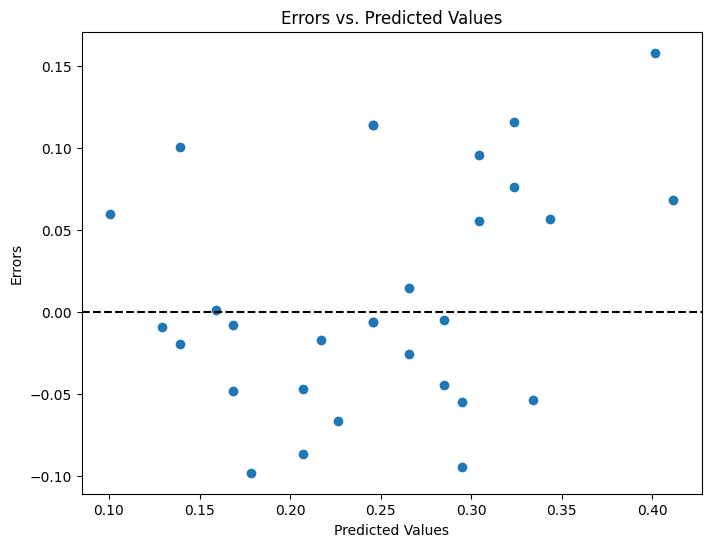

Iteration 4: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6543


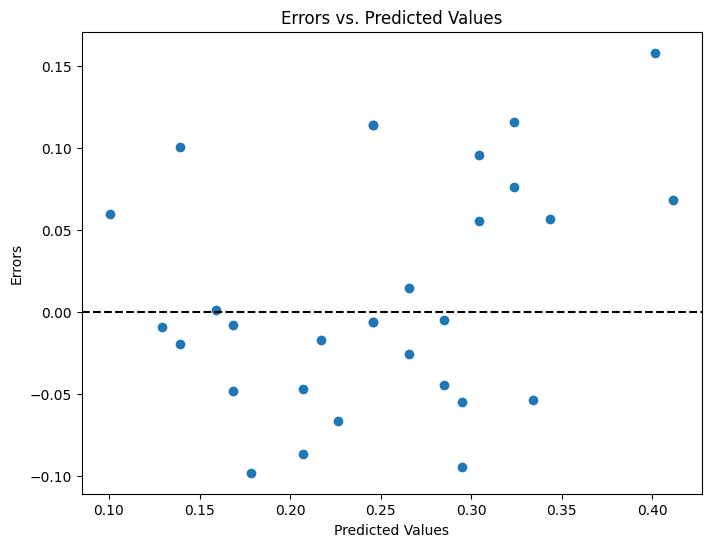

Iteration 5: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6543


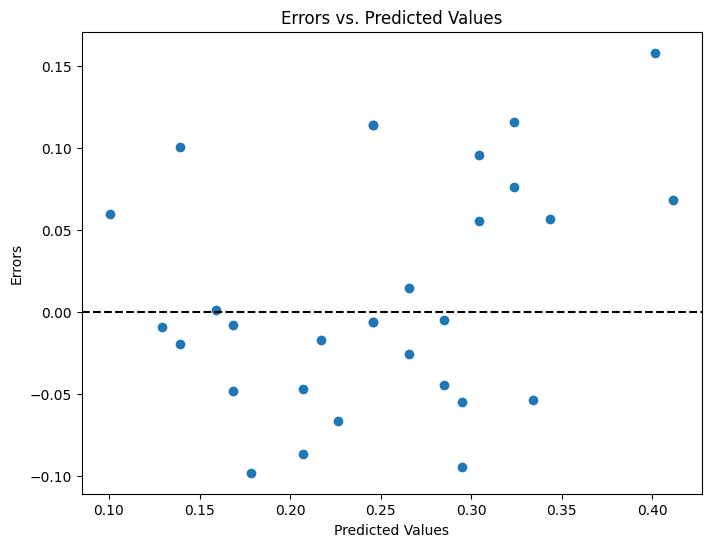

Iteration 6: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6543


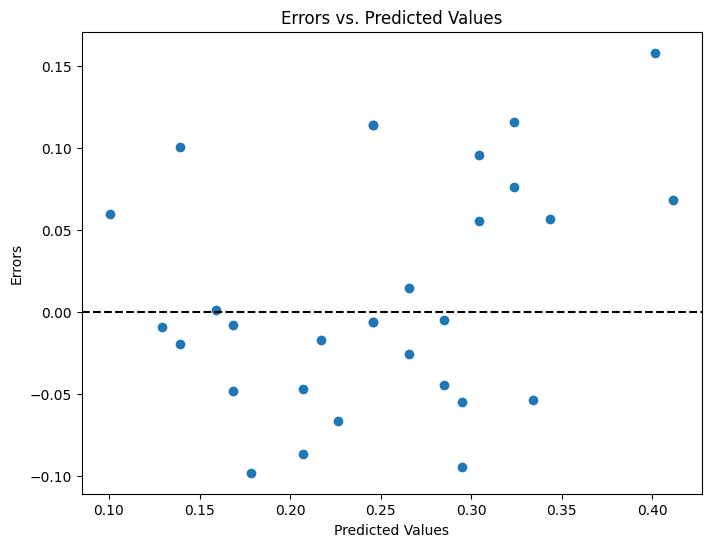

Iteration 7: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6543


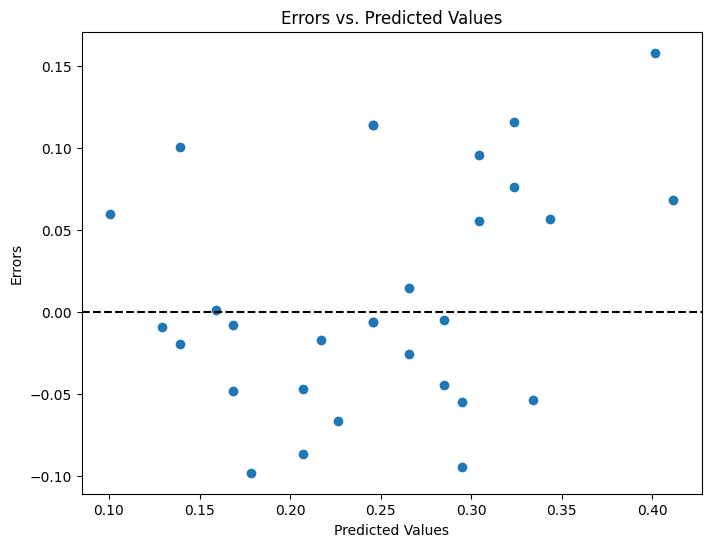

Iteration 8: Selected features: ['CLM', 'LVL_Associate', 'LVL_Senior Partner'] R-squared: 0.6543


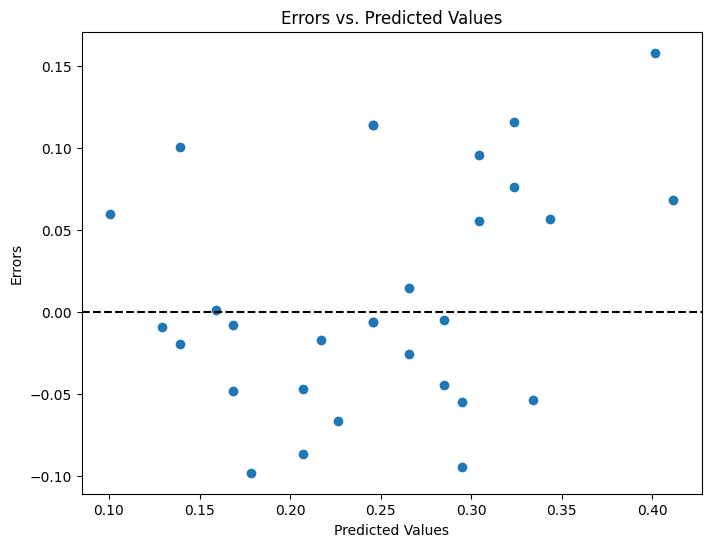

In [12]:
lasso_model = Lasso(alpha=0.01)

selection_process = SelectFromModel(lasso_model)

selected_features = []

for i in range(1, len(X_train.columns) + 1):
    selection_process.max_features = i
    
    selection_process.fit(X_train, y_train)
    
    selected_mask = selection_process.get_support()
    selected_features = list(X_train.columns[selected_mask])
    
    lasso_model.fit(X_train[selected_features], y_train)
    
    y_pred = lasso_model.predict(X_test[selected_features])
    
    r_squared = r2_score(y_test, y_pred)
    
    print(f'Iteration {i}: Selected features: {selected_features} R-squared: {r_squared:.4f}')
    
    errors = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, errors)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Errors vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
    plt.show()


## __2.4 Ridge Regression__

Iteration 1: Selected features: ['CLM'] R-squared: 0.7548


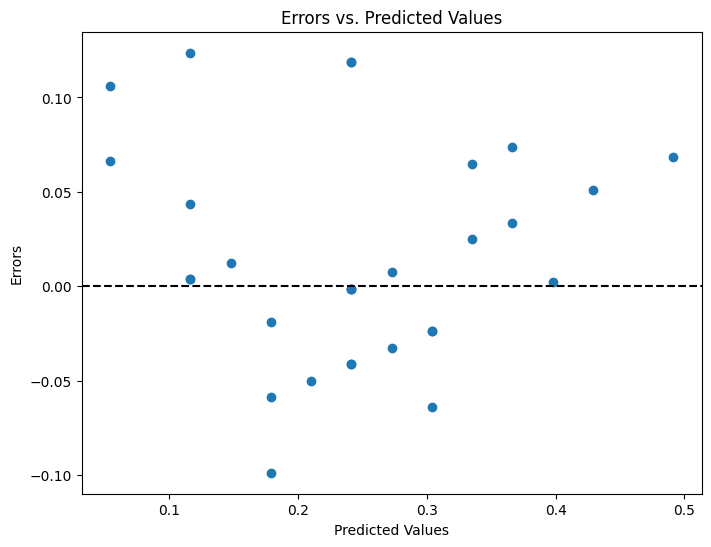

Iteration 2: Selected features: ['CLM', 'SDY'] R-squared: 0.7571


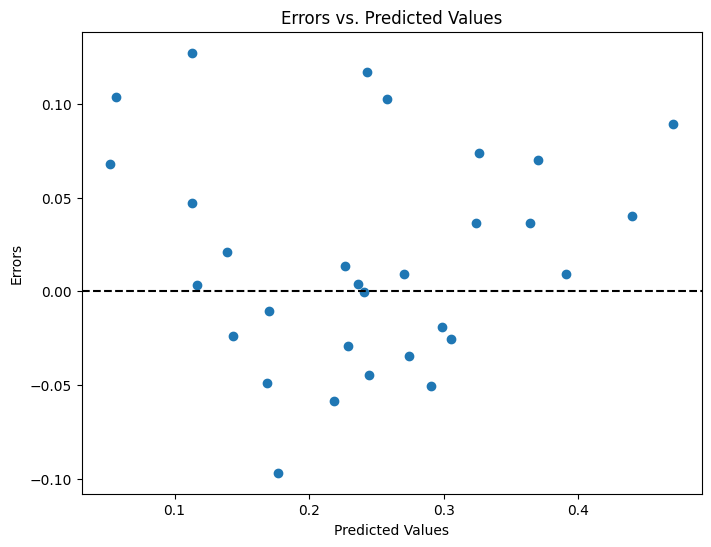

Iteration 3: Selected features: ['CLM', 'SDY'] R-squared: 0.7571


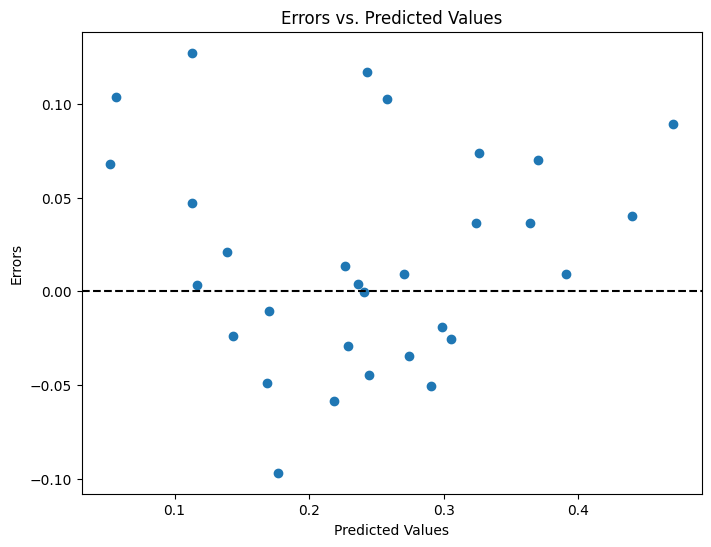

Iteration 4: Selected features: ['CLM', 'SDY'] R-squared: 0.7571


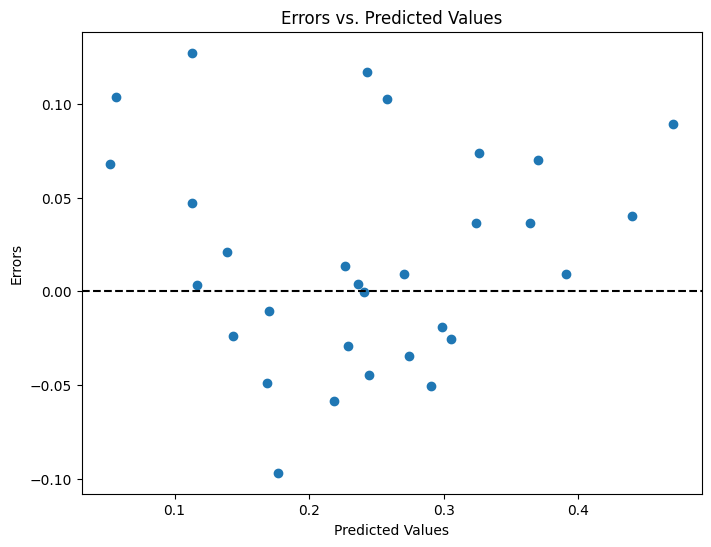

Iteration 5: Selected features: ['CLM', 'SDY'] R-squared: 0.7571


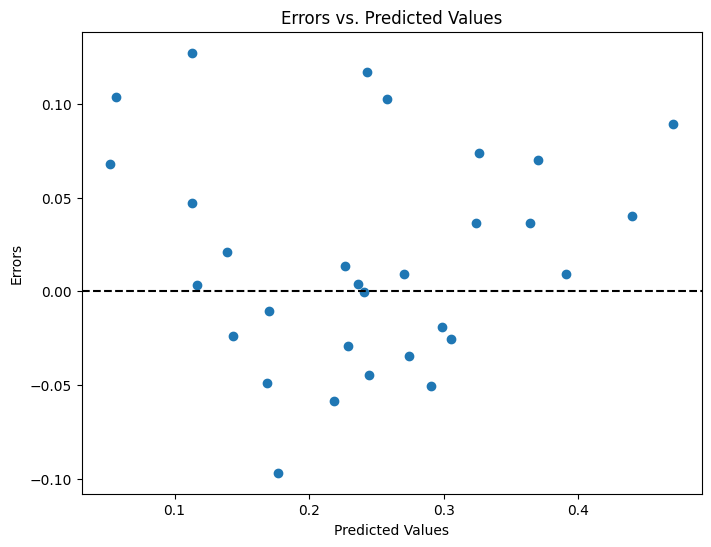

Iteration 6: Selected features: ['CLM', 'SDY'] R-squared: 0.7571


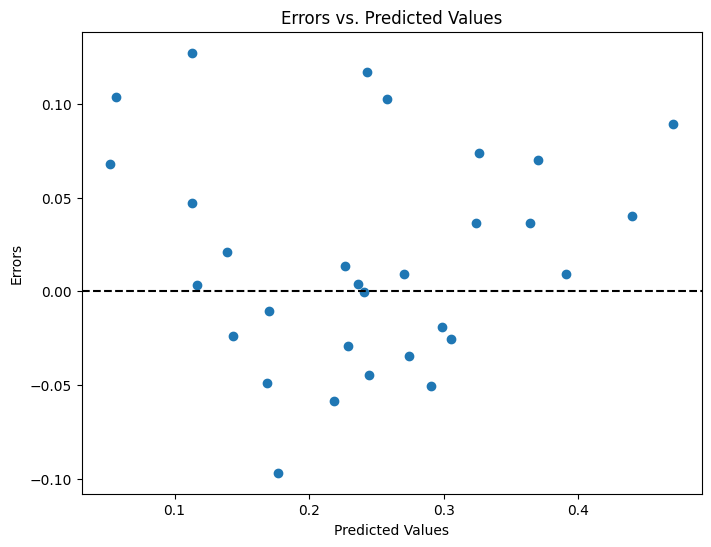

Iteration 7: Selected features: ['CLM', 'SDY'] R-squared: 0.7571


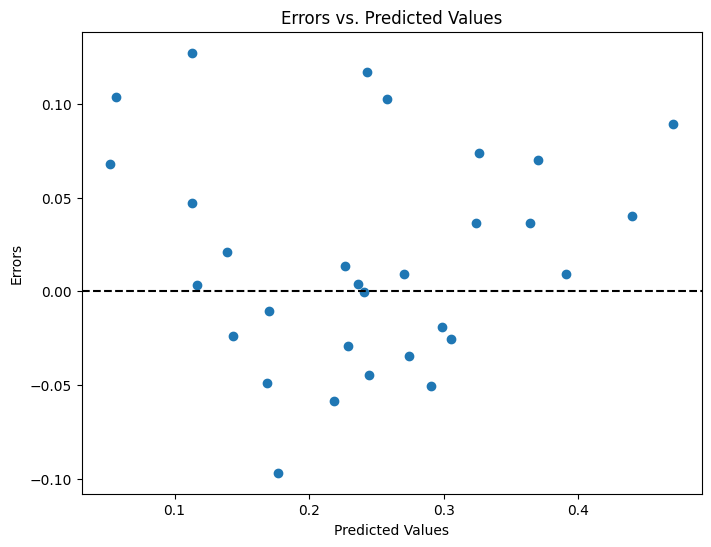

Iteration 8: Selected features: ['CLM', 'SDY'] R-squared: 0.7571


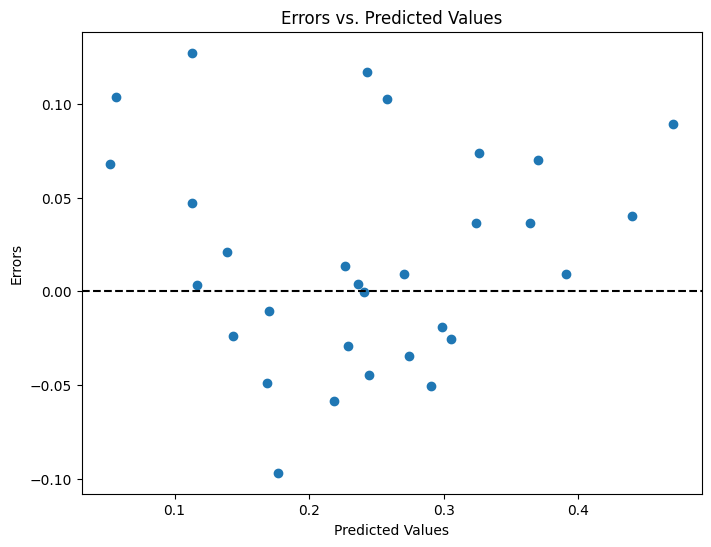

In [13]:
ridge_model = Ridge(alpha=1.0)  

selection_process = SelectFromModel(ridge_model)
selected_features = []

for i in range(1, len(X_train.columns) + 1):
    selection_process.max_features = i
    
    selection_process.fit(X_train, y_train)
    
    selected_mask = selection_process.get_support()
    selected_features = list(X_train.columns[selected_mask])
    
    ridge_model.fit(X_train[selected_features], y_train)
    
    y_pred = ridge_model.predict(X_test[selected_features])
    
    r_squared = r2_score(y_test, y_pred)
    
    print(f'Iteration {i}: Selected features: {selected_features} R-squared: {r_squared:.4f}')
    
    errors = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, errors)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Errors vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
    plt.show()

# Question 3

We used R-squared as our evaluation metric and it helped determine which models work best for our data. With R-squared, the value from 0 to 1 is interpreted as percentages. The higher the value, the better the model is. These models have the different variables modelled against CTM as our current indicator.

For the Forward Selection Model, we see that it ranges from the 70-72 percent region, where 72.13% accuracy is its highest value when working with this model.

For the Backward Selection Model, we see that the models ranges from the 70-73 percent region, where 73.01% is the highest accuracy value when working with this model.

# Question 4

Considering our goal in this assignment will be to predict the number of cases a lawyer will handle this month given the
number that they handled last month, their age, their level of seniority and the number of sick days taken
in the last year, we feel that these models make sense as they are easy to understand since they visualise and easily calculate the accuracy indicators.

With calculating R-squared,

# Question 5

# Question 6

# Question 7